In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic=pd.read_csv("train.csv")
#ticket num, name, id are not features
titanic.drop("Ticket",axis=1,inplace=True)
titanic.drop("Name",axis=1,inplace=True)
titanic.drop("PassengerId",axis=1,inplace=True)
#77% percent of cabin is missing so we have to drop that
titanic.drop("Cabin",axis=1,inplace=True)

#filling null ages with mean of ages only 20% missing
titanic.Age.fillna(titanic.Age.mean(),inplace=True)
#droping the 2 missing embarked entries

titanic.Embarked.dropna(inplace=True,axis=0,how="any")


In [3]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

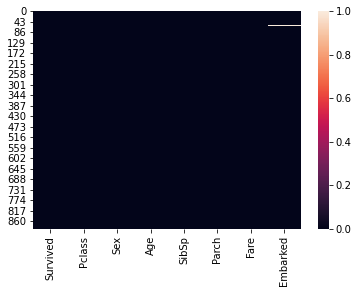

In [4]:
sns.heatmap(titanic.isnull())


survived: 
 [0 1]
P class: 
 [3 1 2]
Sex: 
 ['male' 'female']
Sibling / spouse 
 [1 0 3 4 2 5 8]
parents / children 
 [0 1 2 5 3 4 6]
Port of Embarkation 
  ['S' 'C' 'Q']


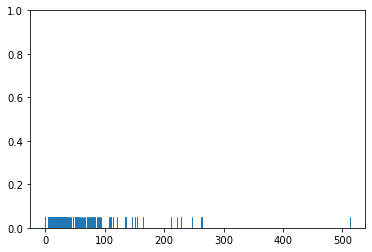

In [5]:
print ("survived: \n",titanic.Survived.unique())
print ("P class: \n",titanic.Pclass.unique())
print ("Sex: \n",titanic.Sex.unique())
print ("Sibling / spouse \n",titanic.SibSp.unique())
print ("parents / children \n",titanic.Parch.unique())
print ("Port of Embarkation \n ",titanic.Embarked.unique())
sns.rugplot(titanic.Fare)


In [6]:
#looks like there are outlier in fare 
#i decided not to drop them because they make sense.they are wealthy and young, hence have a good chance of survival
titanic[titanic.Fare >300]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


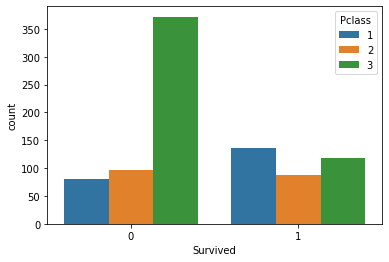

In [7]:
sns.countplot(titanic.Survived, hue=titanic.Pclass)
#passengers from 1st class seem to have more chance that they survive
#passengers from 2nd class look like fairly equal survival rate
#passengers from 3rd class, well, they took the hit

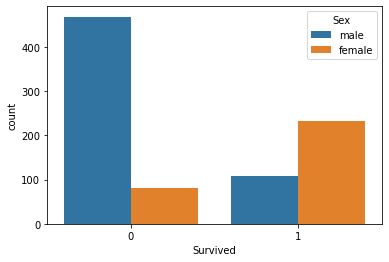

In [8]:
sns.countplot(titanic.Survived, hue=titanic.Sex)
#doesn't look very gender equality to me

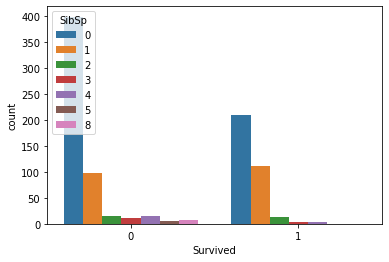

In [9]:
sns.countplot(titanic.Survived, hue=titanic.SibSp)

In [10]:
#titanic[titanic.duplicated()]
#there are duplicates but it turned out it's just that some passengers coincide to have the same information
#but have different IDs that i dropped earlier

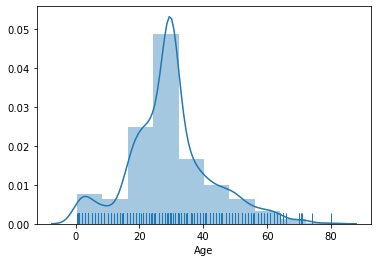

In [11]:
sns.distplot(titanic.Age, rug=True,bins=10)

In [12]:
print (titanic.Age.std())
print (titanic.Age.mean())


13.002015226002884
29.699117647058763


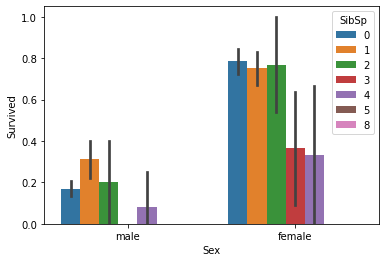

In [14]:
sns.barplot(x=titanic.Sex , y=titanic.Survived, hue=titanic.SibSp)

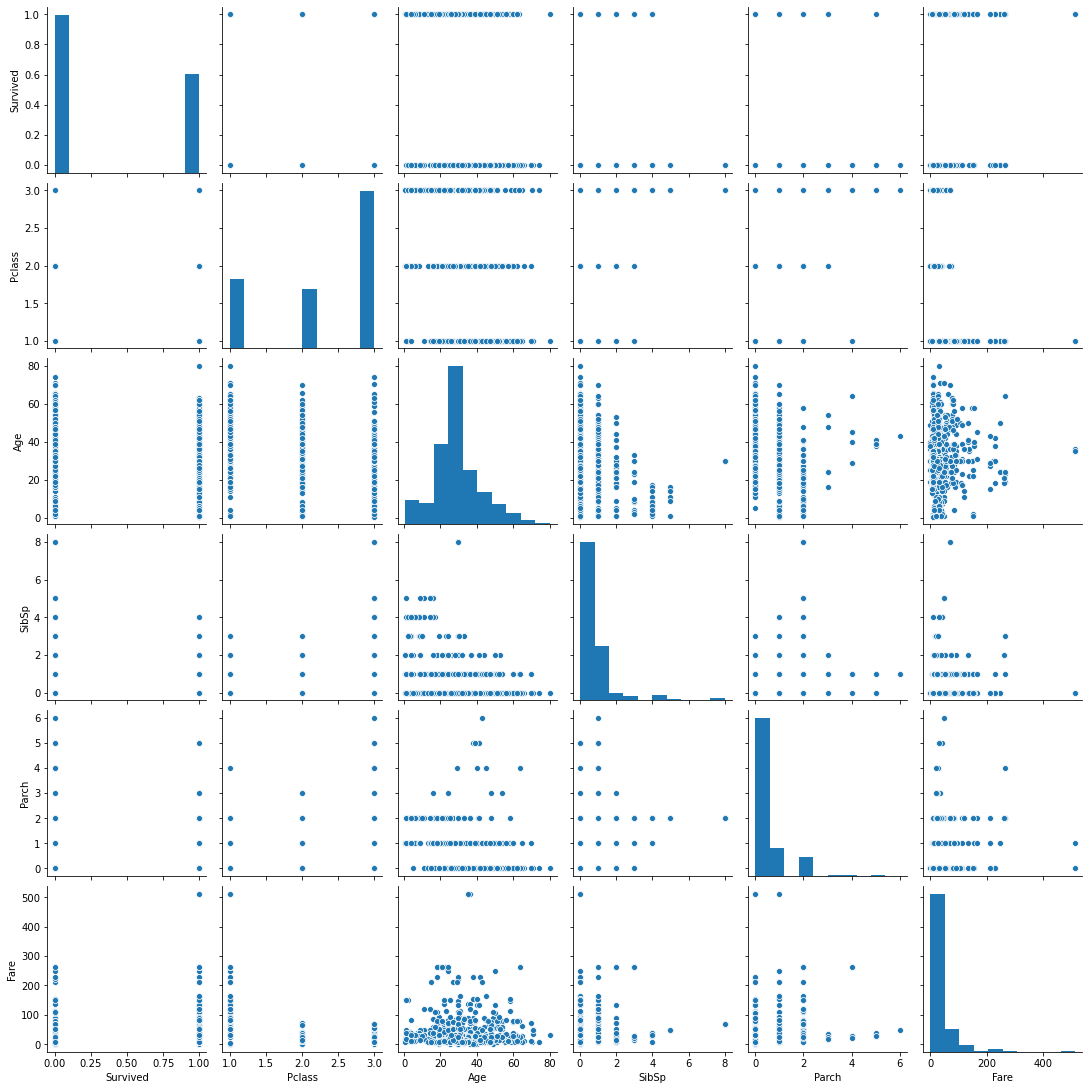

In [15]:
sns.pairplot(titanic)

In [16]:
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [17]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [18]:
titanic=pd.get_dummies(data=titanic,columns=['Sex','Embarked'],drop_first=True)

In [19]:
from sklearn.model_selection import train_test_split

X=titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male','Embarked_Q', 'Embarked_S']]
y=titanic["Survived"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#wtf is stratify

In [21]:
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test ,test_size=0.5)

In [22]:
#logistic
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

parameters = {'max_iter':[300,500,1000], 'C':[.1,.2,.3,1]}

clf = GridSearchCV(lr, parameters,scoring="recall")

clf.fit(X_train,y_train)


#Inverse of regularization strength
#penalization

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 0.3, 1], 'max_iter': [300, 500, 1000]},
             scoring='recall')

In [23]:
bst_logst=clf.best_estimator_

In [24]:
y_predict=bst_logst.predict(X_val)

In [25]:
y_predict

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0])

In [33]:
print (bst_logst.intercept_)
print (bst_logst.coef_)


[5.05479499]
[[-1.01280532 -0.04445181 -0.29519676 -0.09518478  0.00305742 -2.57737384
   0.21525777 -0.3233718 ]]


In [83]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [91]:
x=np.array([1,22,1,0,250,1,1,0]) #features by order, Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q','Embarked_S' 

b=bst_logst.intercept_
w=bst_logst.coef_ 
y=x @ w.transpose()+b #y=X.W+b

z=1/(1+np.exp(-y)) #applying sigmoid
print (z) # z = P(y=1 | x) 
#Here i can see the probablity of survival better for the pre trained model while changing features 
#the most interesting parts are, the more you pay the better chance you get as well as the younger you  are
#it's also interesting that this prediction is not ressitant to unrealstic features
#like your age can be negative and yes you have better chance of survival, but perhaps ,
#sckitlearn 's predtion function offers more robust prediction, i gotta try this later

[0.76334241]


In [85]:
w.shape

(1, 8)

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_predict)


0.835820895522388

In [30]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=4,criterion='entropy')
dt.fit(X_train,y_train)
y_predict_dt=dt.predict(X_test)

In [31]:
accuracy_score(y_test, y_predict_dt)

0.8208955223880597

In [92]:
'''from sklearn import tree
tree.plot_tree(dt,max_depth=4,fontsize=5,filled=True)'''

'from sklearn import tree\ntree.plot_tree(dt,max_depth=4,fontsize=5,filled=True)'

In [93]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [97]:
#this is for binary classification
print(confusion_matrix(y_test, y_predict_dt))
print(classification_report(y_test, y_predict_dt))
print("decision tree Accuracy :", accuracy_score(y_test, y_predict_dt))

[[77 11]
 [13 33]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        88
           1       0.75      0.72      0.73        46

    accuracy                           0.82       134
   macro avg       0.80      0.80      0.80       134
weighted avg       0.82      0.82      0.82       134

decision tree Accuracy : 0.8208955223880597
